## Hyper Parameter Tuning for Neural Nets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=6aed34e4857b0a6ca21f5f9aa933baf1cb61fce40754be89b9c5cda348e03b99
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


## Load Data

In [ ]:
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

path = "/content/drive/My Drive/P1_Final/"
    
train_read = os.path.join(path,"data/P1_NeuralNets_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_NeuralNets_preprocess_TESTSET.csv")
df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

print("Successfully loaded preprocessed data sets")
print(df_train.shape)
print(df_test.shape)



Successfully loaded preprocessed data sets
(81173, 66)
(35179, 66)


### Converting into Numpy arrays

In [ ]:
# converting x, y numpy arrays for TensorFlow 
x_train, y_train = dataprep.to_xy(df_train, 'label')
x_test, y_test = dataprep.to_xy(df_test, 'label')
print(f"Training set shape x:{x_train.shape} y:{y_train.shape}")
print(f"Testing set shape x:{x_test.shape} y:{y_test.shape}")
y_train

Training set shape x:(81173, 65) y:(81173, 2)
Testing set shape x:(35179, 65) y:(35179, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Model Creation and Training



*   Optimizer: Adam with default settings
*   Activation function : tanh
*   Batch size : 128
*   Changes to no. of neurons and layers



In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_hp_adam.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

start_time = datetime.now()

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(40, input_dim=x_train.shape[1], activation='tanh'))
    neuralnets_model.add(Dense(15, activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100, batch_size=128)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
635/635 - 2s - loss: 0.0359 - val_loss: 0.0043
Epoch 2/100
635/635 - 1s - loss: 8.7494e-04 - val_loss: 0.0038
Epoch 3/100
635/635 - 1s - loss: 4.3340e-04 - val_loss: 0.0015
Epoch 4/100
635/635 - 1s - loss: 3.5140e-04 - val_loss: 9.5672e-04
Epoch 5/100
635/635 - 1s - loss: 1.8211e-04 - val_loss: 0.0019
Epoch 6/100
635/635 - 1s - loss: 2.9456e-04 - val_loss: 0.0020
Epoch 7/100
635/635 - 1s - loss: 2.6683e-04 - val_loss: 0.0016
Epoch 8/100
635/635 - 1s - loss: 8.0089e-05 - val_loss: 0.0017
Epoch 00008: early stopping
Epoch 1/100
635/635 - 1s - loss: 0.0299 - val_loss: 0.0032
Epoch 2/100
635/635 - 1s - loss: 9.2984e-04 - val_loss: 0.0040
Epoch 3/100
635/635 - 1s - loss: 6.7364e-04 - val_loss: 0.0037
Epoch 4/100
635/635 - 1s - loss: 3.7780e-04 - val_loss: 0.0012
Epoch 5/100
635/635 - 1s - loss: 3.4560e-04 - val_loss: 0.0032
Epoch 6/100
635/635 - 1s - loss: 3.5374e-04 - val_loss: 0.0034
Epoch 7/100
635/635 - 1s - loss: 3.9088e-04 - val_loss: 6.4760e-04
Epoch 8/100
635/635 - 1s - 

Performance Metrics for Default ADAM Optimizer
---------------------------------------
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


[[ 9625     0]
 [    0 25554]]


Plotting confusion matrix


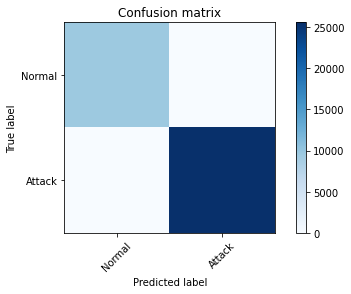



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




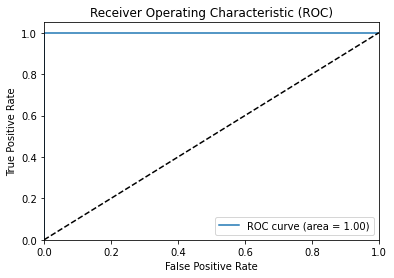

In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics for Default ADAM Optimizer")

* Optimizer: SGD with default settings
* Activation function : tanh
* Batch size : 128
* Changes to no. of neurons and layers

In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_hp_sgd.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

start_time = datetime.now() 
for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(40, input_dim=x_train.shape[1], activation='tanh'))
    neuralnets_model.add(Dense(15, activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100, batch_size=128)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
neuralnets_model.load_weights(filepath_savemodel) # load weights from best model

Epoch 1/100
635/635 - 2s - loss: 0.2691 - val_loss: 0.1355
Epoch 2/100
635/635 - 1s - loss: 0.0392 - val_loss: 0.0429
Epoch 3/100
635/635 - 1s - loss: 0.0160 - val_loss: 0.0215
Epoch 4/100
635/635 - 1s - loss: 0.0092 - val_loss: 0.0142
Epoch 5/100
635/635 - 1s - loss: 0.0062 - val_loss: 0.0104
Epoch 6/100
635/635 - 1s - loss: 0.0045 - val_loss: 0.0083
Epoch 7/100
635/635 - 1s - loss: 0.0035 - val_loss: 0.0067
Epoch 8/100
635/635 - 1s - loss: 0.0029 - val_loss: 0.0058
Epoch 9/100
635/635 - 1s - loss: 0.0024 - val_loss: 0.0052
Epoch 10/100
635/635 - 1s - loss: 0.0021 - val_loss: 0.0047
Epoch 11/100
635/635 - 1s - loss: 0.0018 - val_loss: 0.0044
Epoch 12/100
635/635 - 1s - loss: 0.0016 - val_loss: 0.0041
Epoch 13/100
635/635 - 1s - loss: 0.0015 - val_loss: 0.0038
Epoch 14/100
635/635 - 1s - loss: 0.0013 - val_loss: 0.0036
Epoch 15/100
635/635 - 1s - loss: 0.0012 - val_loss: 0.0036
Epoch 16/100
635/635 - 1s - loss: 0.0011 - val_loss: 0.0033
Epoch 17/100
635/635 - 1s - loss: 0.0011 - val_lo

Performance Metrics for Default SGD Optimizer
---------------------------------------
Accuracy score: 0.9990050882628841
Precision score: 0.9990050098564728
Recall score: 0.9990050882628841
F1 score: 0.9990050399237704


[[ 9606    19]
 [   16 25538]]


Plotting confusion matrix


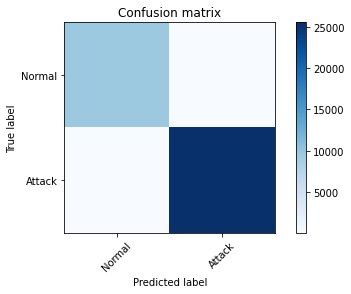



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




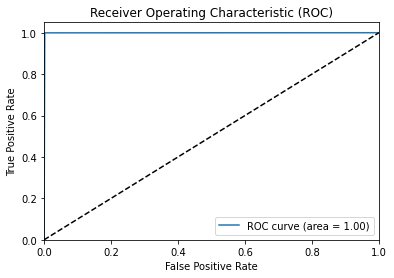

In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics for Default SGD Optimizer")

SGD Optimizer with Custom parameters

In [ ]:
from tensorflow.keras import optimizers

filepath_savemodel = os.path.join(path,"dnn/proj1_hp_sgd_custom.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model
sgd_custom = optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.8, nesterov=True)

start_time = datetime.now()

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(40, input_dim=x_train.shape[1], activation='sigmoid'))
    neuralnets_model.add(Dense(15, activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer=sgd_custom)

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=2, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

neuralnets_model.load_weights(filepath_savemodel) # load weights from best model

Epoch 1/100
2537/2537 - 4s - loss: 0.0335 - val_loss: 0.0079
Epoch 2/100
2537/2537 - 3s - loss: 0.0025 - val_loss: 0.0038
Epoch 3/100
2537/2537 - 3s - loss: 0.0016 - val_loss: 0.0034
Epoch 00003: early stopping
Epoch 1/100
2537/2537 - 3s - loss: 0.2250 - val_loss: 0.2054
Epoch 2/100
2537/2537 - 3s - loss: 0.0612 - val_loss: 0.0979
Epoch 3/100
2537/2537 - 3s - loss: 0.0322 - val_loss: 0.0501
Epoch 4/100
2537/2537 - 3s - loss: 0.0184 - val_loss: 0.0311
Epoch 5/100
2537/2537 - 3s - loss: 0.0120 - val_loss: 0.0192
Epoch 6/100
2537/2537 - 3s - loss: 0.0087 - val_loss: 0.0172
Epoch 7/100
2537/2537 - 3s - loss: 0.0068 - val_loss: 0.0117
Epoch 00007: early stopping
Epoch 1/100
2537/2537 - 3s - loss: 0.4306 - val_loss: 0.2977
Epoch 2/100
2537/2537 - 3s - loss: 0.1260 - val_loss: 0.2360
Epoch 3/100
2537/2537 - 3s - loss: 0.0834 - val_loss: 0.1948
Epoch 4/100
2537/2537 - 3s - loss: 0.0669 - val_loss: 0.1538
Epoch 5/100
2537/2537 - 3s - loss: 0.0543 - val_loss: 0.1214
Epoch 6/100
2537/2537 - 3s - 

## Model Performance Evaluation

Performance Metrics for SGD with Custom Parameters
---------------------------------------
Accuracy score: 0.9994599050569942
Precision score: 0.9994603063319293
Recall score: 0.9994599050569942
F1 score: 0.9994597386093086


[[ 9606    19]
 [    0 25554]]


Plotting confusion matrix


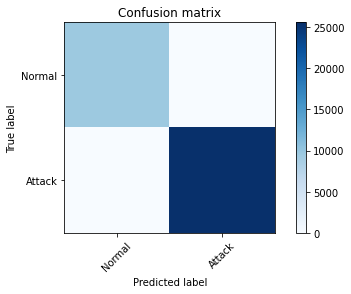



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




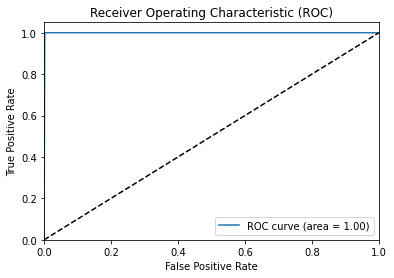

In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics for SGD with Custom Parameters")

In [ ]:
from tensorflow.keras import optimizers

filepath_savemodel = os.path.join(path,"dnn/proj1_hp_adam_custom.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model
adam_custom = optimizers.Adam(learning_rate=0.1 , beta_1 = 0.8, beta_2 = 0.99)

start_time = datetime.now()

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(40, input_dim=x_train.shape[1], activation='sigmoid'))
    neuralnets_model.add(Dense(15, activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer=adam_custom)

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=2, verbose=2, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)

time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

neuralnets_model.load_weights(filepath_savemodel) # load weights from best model

Epoch 1/100
2537/2537 - 3s - loss: 0.0147 - val_loss: 0.0074
Epoch 2/100
2537/2537 - 3s - loss: 0.0090 - val_loss: 0.0073
Epoch 3/100
2537/2537 - 3s - loss: 0.0106 - val_loss: 0.0047
Epoch 00003: early stopping
Epoch 1/100
2537/2537 - 4s - loss: 0.0193 - val_loss: 0.0143
Epoch 2/100
2537/2537 - 3s - loss: 0.0058 - val_loss: 0.0085
Epoch 3/100
2537/2537 - 3s - loss: 0.0170 - val_loss: 0.0149
Epoch 00003: early stopping
Epoch 1/100
2537/2537 - 3s - loss: 0.0240 - val_loss: 0.0107
Epoch 2/100
2537/2537 - 4s - loss: 0.0083 - val_loss: 0.0032
Epoch 3/100
2537/2537 - 3s - loss: 0.0070 - val_loss: 0.0351
Epoch 00003: early stopping
Epoch 1/100
2537/2537 - 3s - loss: 0.0247 - val_loss: 0.0223
Epoch 2/100
2537/2537 - 3s - loss: 0.0105 - val_loss: 0.0283
Epoch 3/100
2537/2537 - 3s - loss: 0.0082 - val_loss: 0.0109
Epoch 4/100
2537/2537 - 3s - loss: 0.0163 - val_loss: 0.0068
Epoch 5/100
2537/2537 - 3s - loss: 0.0070 - val_loss: 0.0067
Epoch 00005: early stopping
Epoch 1/100
2537/2537 - 3s - loss:

Performance Metrics for Custom ADAM optimizers
---------------------------------------
Accuracy score: 0.9995736092555217
Precision score: 0.9995740066201406
Recall score: 0.9995736092555217
F1 score: 0.9995736851158504


[[ 9623     2]
 [   13 25541]]


Plotting confusion matrix


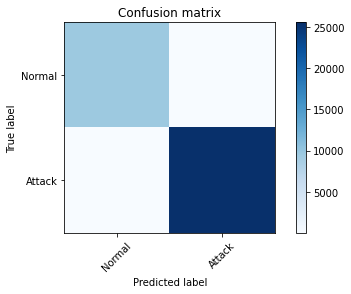



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




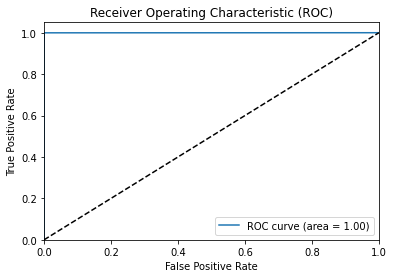

In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics for Custom ADAM optimizers")